In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import pydotplus as pdot

In [2]:
# Read the data from csv file and perform any necessary preprocessing.
data = pd.read_csv('HR_comma_sep.csv')

In [3]:
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [4]:
labelencoder=LabelEncoder()
for col in ['Department', 'salary']:
    data[col] = labelencoder.fit_transform(data[col])

In [5]:
x_data = data.drop('left', axis=1) # all rows, all the features and no labels
y_data = data['left']  # all rows, label only

In [6]:
print(x_data)


       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4          

In [7]:
print(y_data)

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64


In [8]:
# Split your data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=4)

In [9]:
# Fit a decision tree classifier to the training data 
model_tree = DecisionTreeClassifier(criterion='entropy')
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
# Check the accuracy of the Decision Tree on your test dataset and print the accuracy.
y_pred = model_tree.predict(X_test)

print (model_tree.score(X_test, y_test)*100)

97.86666666666667


In [11]:
# Check the accuracy of the Decision Tree on your test dataset and print the accuracy.
y_pred = model_tree.predict(X_train)

print (model_tree.score(X_train, y_train)*100)

100.0


In [12]:
clf = RandomForestClassifier(
    n_estimators=1000, 
    max_depth=None, 
    min_samples_split=10, 
    class_weight="balanced"
    )
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [13]:
# Check the accuracy of the Decision Tree on your test dataset and print the accuracy.
y_acc = clf.score(X_test, y_test)
print (y_acc*100)

98.86666666666667


In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pdot

C:\Users\Radhika\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [16]:

#write the dot data
dot_data = StringIO()

In [17]:
export_graphviz(model_tree,out_file=dot_data,filled=True,
                rounded=True,special_characters=True,feature_names = X_train.columns.values)

In [18]:
#make a graph from dot file 
graph = pdot.graph_from_dot_data(dot_data.getvalue())

In [19]:
graph

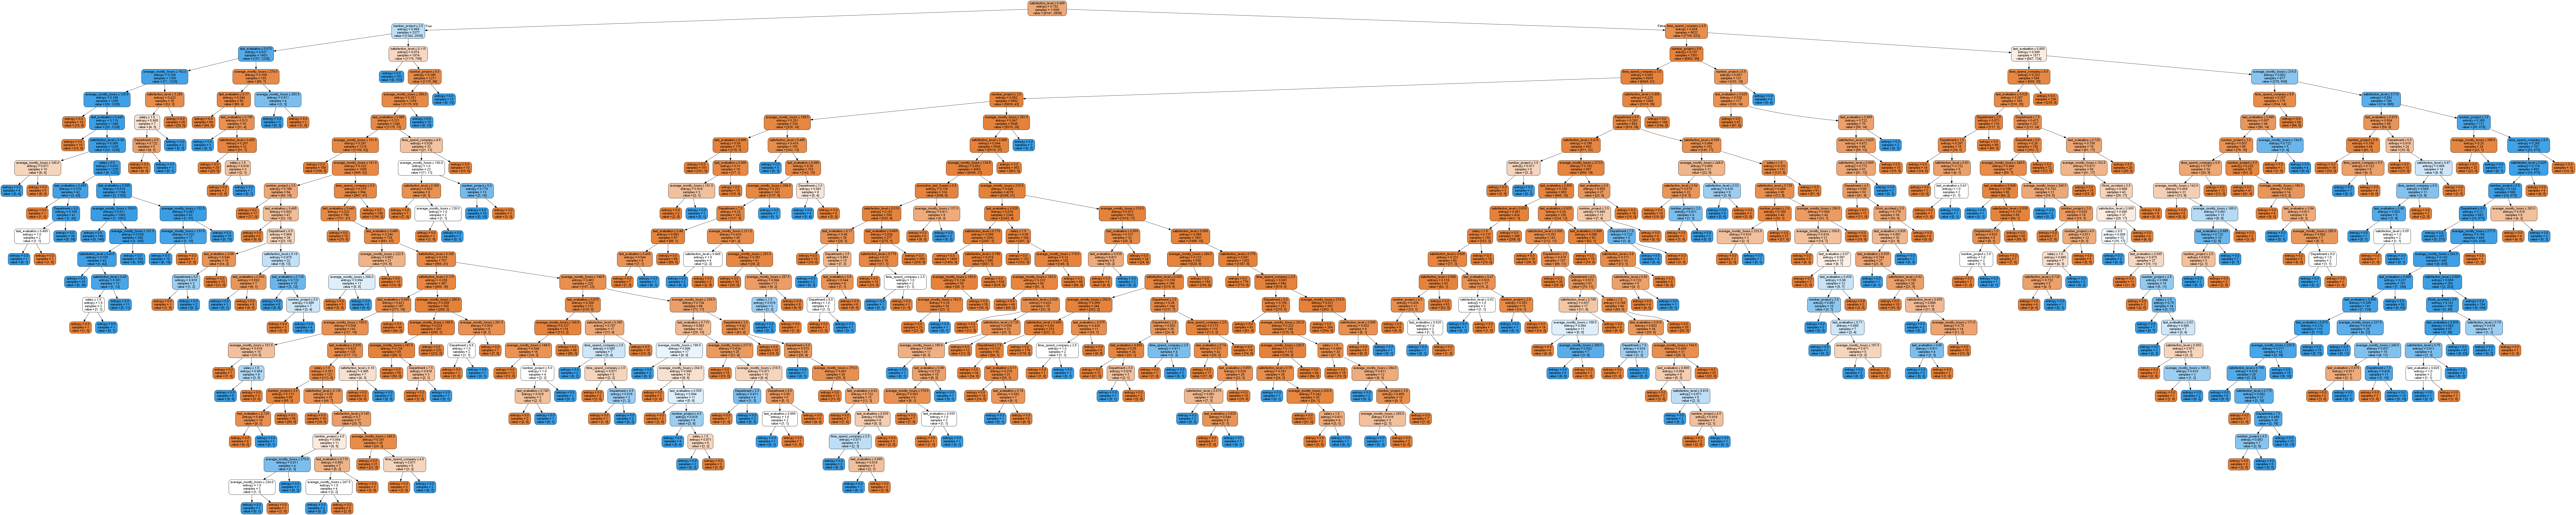

In [20]:
Image(graph.create_png())